# An Analysis on [Stop and Frisk](https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City)

#### By: Denton Paul

# Part 1 - Modeling/MLR

## Introduction

The 2020 Democratic Party presidential primaries have seen renewed scrutiny of the New York police department's policy of [stop-and-frisk](https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City). The program was controversial because of suggestions of racial profiling, i.e. that some minorities were unfairly targeted by the police.

The dataset frisk.csv includes recordings of NYPD stops for a fifteen-month period in 1998 - 1999. The specific variables contained in this data are:
+ precint: [NYC precint](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz) indicator, with values 1, 2, . . . , 75. 
+ eth: Ethnicity indicator, with 1 denoting Black, 2 denoting Hispanic, and 3 denoting White.
+ popl: The total population of a particular ethnicity in a given precint. 
+ crime: Crime category indicator, with 1 denoting violent crimes, 2 denoting weapons crimes, 3 denoting property crimes, and 4 denoting drug crimes.
+ stops: Number of police stops for a specific crime category among individuals of a particular ethnicity in a given precint. 
+ past: The total number of past arrests for a specific crime category among individuals of a particular ethnicity in a given precint.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

1) We will load the dataset from $\mathtt{frisk.csv}$. The column crime indicates 4 different kinds of crime. For simplicity, we will pool information across crime types. Then, we will produce a smaller dataframe without the column $\mathtt{crime}$, and with $\mathtt{stops}$ and $\mathtt{popl}$ giving the total number of stops and past arrests for that $\mathtt{(precinct,eth)}$ irrespective of crime type.

In [195]:
df = pd.read_csv('frisk.csv')

orig = (df.groupby(['precinct', 'eth'])
   .agg({'popl': 'first', 'stops': 'sum', 'past': 'sum'}))
orig = orig.reset_index()
orig.head(10)

ggplot() + geom_boxplot(dfo, aes(x='Location', y='Price'), fill='gold', size=3, alpha=.7) + \
geom_line(df_mn, aes(x='Location', y='Price', group=0))

dfwithoutoutlier
df_mn = dfo.groupby('Location').mean()

,precinct,eth,popl,stops,past
0,1,1,1720,202,980
1,1,2,1368,102,295
2,1,3,23854,81,381
3,2,1,2596,132,753
4,2,2,6844,144,557
5,2,3,9379,71,431
6,3,1,2092,752,2188
7,3,2,3633,441,627
8,3,3,56304,410,1238
9,4,1,5699,385,471


2) We will plot a scatter plot of population of precinct (x-axis) vs number of stops in that precinct (y-axis). 
Next, we will fit a straight line __passing through the origin__ for this data, with $\mathtt{stops}$ as output and $\mathtt{popl}$ as input.

The slope of the line gives the increase in the number of stops if the population increases by 1 (or put another way, the average number of stops a new person would experience in that period).

Slope: 0.013381


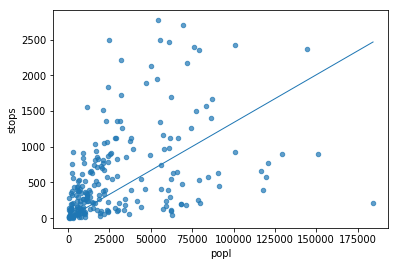

In [196]:
ax = orig.plot(kind='scatter', x='popl', y='stops', alpha=0.7)

mod = smf.ols(formula='stops~popl-1', data=orig)
rslt = mod.fit()

xmin, xmax = orig.popl.min(), orig.popl.max()
x = np.arange(xmin, xmax)

print('Slope: %f' %(rslt.params[0]))
ax.plot(x, x*rslt.params[0], linewidth=1)

- Note: The stops double when population doubles.

3) Now we will fit a general straight line for this data, again with $\mathtt{stops}$ as output and $\mathtt{popl}$ as input, and report the parameters. We will then create another scatterplot of the data with this line plotted.

__Note:__ The intercept of this line gives the number of stops when the population equals 0. Clearly, this does not make any sense. However, in practice, we are not interested in such input values. Including the intercept allows us to better fit the data for useful input values. It is important to not blindly extrapolate to values where the model is unreasonable, or where we haven't seen any data.

Intercept    339.507183
popl           0.008124
dtype: float64


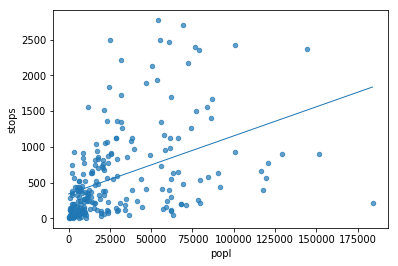

In [197]:
sec = orig.plot(kind='scatter', x='popl', y='stops', alpha=0.7)

mod2 = smf.ols(formula='stops~popl', data=orig)
rslt2 = mod2.fit()

print(rslt2.params)
sec.plot(rslt2.params[0] + x*rslt2.params[1], linewidth=1)

- **slope interpretation**: for an increase of 1 for popl, there is a 0.008124 increase in stops.
    - This is the average growth rate for stops as popl increases.
- The stops do not double due to the presence of a non zero intercept.

The previous model assumes the numbers of stops in a precinct depends only on the precinct's population. Another approach is to model the number of stops in a precinct as a function of the precinct's crime rate. As a proxy for crime rate, we will use the number of arrests in the previous year (column $\mathtt{past}$).

4) We will fit a linear function with $\mathtt{past}$$\mathtt{stops}$ as output, and report the slope and intercept. We will then plot a scatterplot of $\mathtt{past}$ vs $\mathtt{stops}$, along with the fitted line.

Intercept    159.196710
past           0.404165
dtype: float64


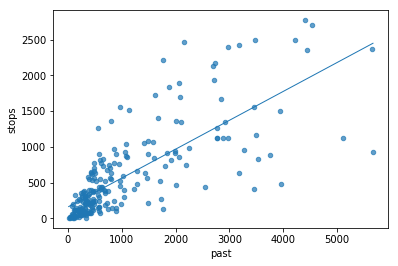

In [198]:
axpast = orig.plot(kind='scatter', x='past', y='stops', alpha=0.7)

mod3 = smf.ols(formula='stops~past', data=orig)
rslt3 = mod3.fit()

xminpast, xmaxpast = orig.past.min(), orig.past.max()
xpast = np.arange(xminpast, xmaxpast)

print(rslt3.params)
axpast.plot(xpast, rslt3.params[0] + rslt3.params[1]*xpast, linewidth=1)

- **slope**: 0.404165, **intercept**: 159.196710

- **slope interpretation**: for an increase of 1 for past crimes, there is a 0.404 increase in stops.
    - This is the average growth rate for stops as past crime rate increases.

5) In general, we expect the number of stops to depend on both population size and crime rate. Hence, we will fit a linear model with $\mathtt{stops}$ as the output, and both $\mathtt{popl}$ __and__ $\mathtt{past}$ as inputs.

This model breaks down the number of stops as dependent on two factors, population size and crime rate. The coefficient associated with $\mathtt{popl}$ gives the increase in the number stops if $\mathtt{popl}$ increases by one, _keeping $\mathtt{past}$ fixed_ (i.e. controlling for crime rate).

In [199]:
mod4 = smf.ols(formula='stops~popl+past', data=orig)
rslt4 = mod4.fit()
rslt4.summary()
print('5a)')
print(rslt4.params)

5a)
Intercept    104.501231
popl           0.002941
past           0.371986
dtype: float64


- The coefficient associated with $past$ gives the increase in the number $stops$ if $past$ increases by one, keeping $popl$ fixed (i.e. controlling for total population)
- So, holding population constant, there is a .37 increase in the number of stops for every additional past crime.

6) Again, we will produce scatterplots of popl vs stops and past vs stops, now coloring each point according to the value of eth.

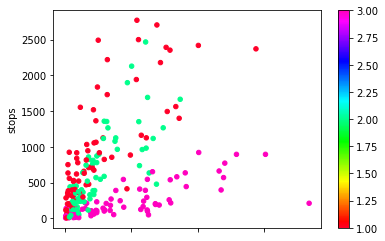

In [200]:
orig.plot(kind='scatter', x='popl', y='stops', c=orig['eth'], cmap='gist_rainbow')

7) We will now create a new dataframe called eth\_count from frisk with 3 rows called 'black', 'hispanic' and 'white', and three columns 'stops', 'popl' and 'past'. Each element of $\mathtt{stops}$ should give the total number of stops for the 3 groups, and similarly for $\mathtt{popl}$ and $\mathtt{past}$. $\ $ 

Next, we will devide each column of eth_count by its sum, producing a new dataframe called eth_prop. Here, each element of $\mathtt{stops}$ should give the proportion of stops for the 3 groups, and similarly for popl and past.

In [201]:
def race(x):
    if x == 1:
        return 'black'
    elif x == 2:
        return 'hispanic'
    else:
        return 'white'
orig['race'] = orig.apply(lambda row: race(row.eth) , axis = 1)
eth_count = orig.groupby('race').agg({'popl':'sum', 'stops': 'sum', 'past': 'sum'})
eth_count

,popl,stops,past
race,,,
black,1865895,69823,125719
hispanic,1732269,44623,74898
white,3175354,16974,35922


In [202]:
eth_prop = eth_count.div(eth_count.sum(axis=0), axis=1)
eth_prop

,popl,stops,past
race,,,
black,0.275469,0.531297,0.531494
hispanic,0.255741,0.339545,0.316641
white,0.468789,0.129158,0.151865


8) Now, we will create a barplot from eth_prop consisting of 3 groups, 'black', 'hispanic' and 'white'. Each group should have 3 different colored bars giving the proportion that group forms of total stops, population and past arrests.

Next, we will create a barplot from eth_prop consisting of 3 groups, 'stops', 'popl' and 'past'.

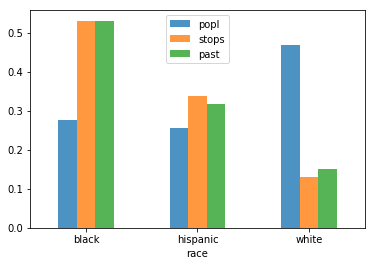

In [203]:
eth_prop.plot(kind='bar', rot=0, alpha=0.8)

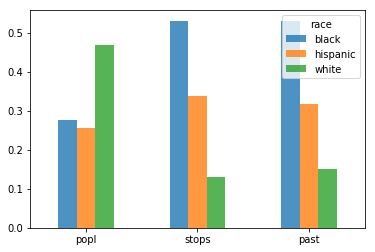

In [204]:
eth_prop.T.plot(kind='bar', rot=0, alpha=0.8)

Looking at the plots above, an opponent of stop-and-frisk would claim the the number of times a black or hispanic person was stopped was disproportionate to their population size. A supporter of the policy would argue that the stops are proportionate with past arrests (or crime-rate). To better understand this, we need to simultaneously understand the effects of both population and crime rate.

9) We will now fit a linear model with stops as output, and popl and past as input separately for each ethnic group. It is difficult to compare slopes if each model has a different intercept, therefore we will force them to pass through the origin.

In [205]:
black = orig[orig['eth']==1]
hispanic = orig[orig['eth']==2]
white = orig[orig['eth'] == 3]

bmod = smf.ols('stops~popl+past-1', data=black)
brslt = bmod.fit()
print('Black')
print(brslt.params, '\n')

hmod = smf.ols('stops~popl+past-1', data=hispanic)
hrslt = hmod.fit()
print('Hispanic')
print(hrslt.params, '\n')

wmod = smf.ols('stops~popl+past-1', data=white)
wrslt = wmod.fit()
print('White')
print(wrslt.params)

Black
popl    0.013460
past    0.276941
dtype: float64 

Hispanic
popl    0.018771
past    0.105169
dtype: float64 

White
popl    0.003802
past    0.137792
dtype: float64


### Summary:
- Black has the largest past coefficient. This means that as the number of past arrests increases by one, holding population constant, the number of stops will increase by 0.28
- Hispanic has the smallest past coefficient. White is in between hispanic and black.
- Hispanic has the largest popl coefficient. This means that as the population of that race increases by one, holding past arrests constant, the number of stops will increase by 0.019
- White has the lowest popl coefficient by far, meaning that the number of stops are not very affected by an increase in white population. Black's stop affect of population change is inbetween hispanic and white.

Instead of three models on three datasets (for each group) it is more informative to fit a single model on a single dataset that also includes group information.

10) Towards this, we will first add 3 columns to $\mathtt{frisk}$, 'black', 'hispanic' and 'white'. Elements of these should be 0 unless the row belongs to the corresponding column, in which case it should be 1 (e.g. if eth = 1, these columns have values (1,0,0) respectively).

In [206]:
orig['black'] = orig.apply(lambda row: row.eth==1, axis=1).astype(int)
orig['hispanic'] = orig.apply(lambda row: row.eth==2, axis=1).astype(int)
orig['white'] = orig.apply(lambda row: row.eth==3, axis=1).astype(int)
orig.head(10)

,precinct,eth,popl,stops,past,race,black,hispanic,white
0,1,1,1720,202,980,black,1,0,0
1,1,2,1368,102,295,hispanic,0,1,0
2,1,3,23854,81,381,white,0,0,1
3,2,1,2596,132,753,black,1,0,0
4,2,2,6844,144,557,hispanic,0,1,0
5,2,3,9379,71,431,white,0,0,1
6,3,1,2092,752,2188,black,1,0,0
7,3,2,3633,441,627,hispanic,0,1,0
8,3,3,56304,410,1238,white,0,0,1
9,4,1,5699,385,471,black,1,0,0


11) We will fit a linear model with $\mathtt{stops}$ as output, and $\mathtt{popl, past, black}$ and $\mathtt{hisp}$ as inputs.

__Interpretation__: For the _same_ population size and crime rate, the coefficient of black gives the change in the number of stops if that population were a black instead of white. Similarly for the coefficient of hispanic. The current dataset would have no evidence of police bias if these two coefficients were close to 0.

To decide if deviations from 0 are big, we will compare these with the mean/median precint population, and the mean/median number of stops.

In [207]:
a = smf.ols('stops~popl+past+black+hispanic', data=orig)
rslt5 = a.fit()

print('Parameters')
print(rslt5.params)


Parameters
Intercept   -156.289946
popl           0.006039
past           0.265046
black        492.745874
hispanic     347.103798
dtype: float64


In [208]:
print('Black popl Mean, Median: ', orig[orig['eth']==1].mean()['popl'], ',', orig[orig['eth']==1].median()['popl'])
print('Black stops Mean, Median: ', orig[orig['eth']==1].mean()['stops'], ',',orig[orig['eth']==1].median()['stops'])
print('Hispanic popl Mean, Median:', orig[orig['eth']==2].mean()['popl'], ',',orig[orig['eth']==2].median()['popl'])
print('Hispanic stops Mean, Median:', orig[orig['eth']==2].mean()['stops'], ',',orig[orig['eth']==2].median()['stops'])
print('White popl Mean, Median:', orig[orig['eth']==3].mean()['popl'], ',',orig[orig['eth']==3].median()['popl'])
print('White stops Mean, Median:', orig[orig['eth']==3].mean()['stops'], ',',orig[orig['eth']==1].median()['stops'])

Black popl Mean, Median:  24878.6 , 14356.0
Black stops Mean, Median:  930.9733333333334 , 711.0
Hispanic popl Mean, Median: 23096.92 , 15774.0
Hispanic stops Mean, Median: 594.9733333333334 , 400.0
White popl Mean, Median: 42338.05333333334 , 29931.0
White stops Mean, Median: 226.32 , 711.0


#### Compared to the values above, the black coefficient seems moderate to the mean and median values. The hispanic coefficient seems moderate compared to the values above.

As a last (and simpler) model, we note that with count data (e.g. population size, number of stops etc), it is often more convenient to work with log-counts rather than counts. 

12) We will add 3 new columns to frisk, $\mathtt{logstops, logpast}$ and $\mathtt{logpopl}$ obtained by taking logatithms of the corresponding columns. 

Next, we will plot a scatter plot of log-population of precinct (x-axis) vs log-number of stops in that precinct (y-axis) and fit a straight line.

__Interpretation:__ the coefficient in this log-log model has a slightly more complicated interpretation, giving the percent change in output if the input changes by 1 percent. It economics, this coefficient is called _elasticity_.

In [209]:
numInitZeros = orig[orig['popl']==0].shape[0] + orig[orig['stops']==0].shape[0] + orig[orig['past']==0].shape[0]
print('There are %d total zeros in popl, stops, past columns.' %(numInitZeros))

There are 0 total zeros in popl, stops, past columns.


##### No need to replace zeros because there are none

In [210]:
orig['logstops'] = np.log10(orig['stops'])
orig['logpast'] = np.log10(orig['past'])
orig['logpopl'] = np.log10(orig['popl'])

orig.head(10)

,precinct,eth,popl,stops,past,race,black,hispanic,white,logstops,logpast,logpopl
0,1,1,1720,202,980,black,1,0,0,2.305351,2.991226,3.235528
1,1,2,1368,102,295,hispanic,0,1,0,2.008600,2.469822,3.136086
2,1,3,23854,81,381,white,0,0,1,1.908485,2.580925,4.377561
3,2,1,2596,132,753,black,1,0,0,2.120574,2.876795,3.414305
4,2,2,6844,144,557,hispanic,0,1,0,2.158362,2.745855,3.835310
5,2,3,9379,71,431,white,0,0,1,1.851258,2.634477,3.972157
6,3,1,2092,752,2188,black,1,0,0,2.876218,3.340047,3.320562
7,3,2,3633,441,627,hispanic,0,1,0,2.644439,2.797268,3.560265
8,3,3,56304,410,1238,white,0,0,1,2.612784,3.092721,4.750539
9,4,1,5699,385,471,black,1,0,0,2.585461,2.673021,3.755799


AxesSubplot(0.125,0.125;0.775x0.755)


Intercept   -0.607629
logpopl      0.181308
logpast      0.841865
dtype: float64

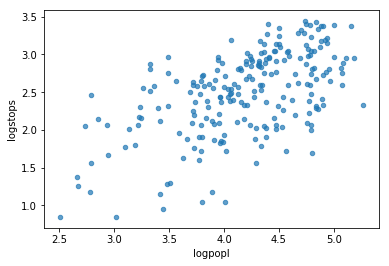

In [211]:
print(orig.plot(kind='scatter', x='logpopl', y='logstops', alpha=0.7))
logMod = smf.ols('logstops~logpopl+logpast', data=orig)
logRslt = logMod.fit()
logRslt.params

13) We have 4 interesting models for perdicting $\mathtt{stops}$, with inputs $\mathtt{(popl), (past), (popl,past)}$ and $\mathtt{(popl,past,black,hist)}$. Our last model predicts log-stops from log-popl and log-past. We want to decide which one is most appropriate. We do this using cross-validation.
+ Recall we have 75 precincts. For each 'fold' of cross-validation, we will hold out 5 precincts, train the models on the rest, and then test on 5 held-out precincts (15 datapoints). Thus there will be a total of 75/5 = 15 folds.
+ For each fold and for each model, we will calculate the sum-squared-error between the predicted number of stops for the test data, and the true number of stops.

In [212]:
#First model
mod1 = {}
j = 0
for i in range(1, 75, 5):
    j += 1
    drop = list(orig[orig['precinct'].between(i, i+4)].index)
    
    test = orig[orig['precinct'].between(i, i+4)]
    
    train = orig.drop(drop)
    
    mod = smf.ols('stops~popl', data=train)
    rslt = mod.fit()
    
    pred = rslt.predict(test['popl'])
    sse = ((test['stops'] - pred)**2).sum().sum()
    mod1['fold' + str(j)] = sse

    

# #Second model
mod2 = {}
j=0
for i in range(1, 75, 5):
    j += 1
    drop = list(orig[orig['precinct'].between(i, i+4)].index)
    
    test = orig[orig['precinct'].between(i, i+4)]
    
    train = orig.drop(drop)
    
    mod = smf.ols('stops~past', data=train)
    rslt = mod.fit()
    
    pred = rslt.predict(test['past'])
    sse = ((test['stops'] - pred)**2).sum().sum()
    mod2['fold' + str(j)] = sse


# Third model
mod3 = {}
j=0
for i in range(1, 75, 5):
    j += 1
    drop = list(orig[orig['precinct'].between(i, i+4)].index)
    
    test = orig[orig['precinct'].between(i, i+4)]
    
    train = orig.drop(drop)
    
    mod = smf.ols('stops~popl+past', data=train)
    rslt = mod.fit()
    
    pred = rslt.predict(test[['popl', 'past']])
    sse = ((test['stops'] - pred)**2).sum().sum()
    mod3['fold' + str(j)] = sse


# Fourth model
mod4 = {}
j=0
for i in range(1, 75, 5):
    j += 1
    drop = list(orig[orig['precinct'].between(i, i+4)].index)
    
    test = orig[orig['precinct'].between(i, i+4)]
    
    train = orig.drop(drop)
    
    mod = smf.ols('stops~popl+past+black+hispanic', data=train)
    rslt = mod.fit()
    
    pred = rslt.predict(test[['popl', 'past', 'black', 'hispanic']])
    sse = ((test['stops'] - pred)**2).sum().sum()
    mod4['fold' + str(j)] = sse

      
# Fifth model
mod5 = {}
j=0
for i in range(1, 75, 5):
    j += 1
    drop = list(orig[orig['precinct'].between(i, i+4)].index)
    
    test = orig[orig['precinct'].between(i, i+4)]
    
    train = orig.drop(drop)
    
    mod = smf.ols('logstops~logpopl+logpast', data=train)
    rslt = mod.fit()
    
    pred = rslt.predict(test[['logpopl', 'logpast']])
    pred = 10**pred
    
    sse = ((test['stops'] - pred)**2).sum().sum()
    mod5['fold' + str(j)] = sse

SSE = pd.DataFrame([mod1, mod2, mod3, mod4, mod5], index=['crossval1', 'crossval2', 'crossval3', 'crossval4', 'crossval5'])
columns = ['fold1', 'fold2', 'fold3', 'fold3', 'fold4', 'fold5', 'fold6', 'fold7', 'fold8', 'fold9', 'fold10', 'fold11', 'fold12', 'fold13', 'fold14', 'fold15']
SSE = SSE[columns].T
SSE


,crossval1,crossval2,crossval3,crossval4,crossval5
fold1,1.310001e+06,1.338251e+06,1.085139e+06,8.247652e+05,8.670218e+05
fold2,2.190008e+06,4.395595e+06,3.604711e+06,2.087916e+06,1.223761e+06
fold3,6.334568e+06,6.418992e+05,1.517649e+06,1.979765e+06,7.941118e+05
fold3,6.334568e+06,6.418992e+05,1.517649e+06,1.979765e+06,7.941118e+05
fold4,1.602059e+06,4.243342e+06,3.547798e+06,2.467092e+06,3.760614e+06
fold5,8.708898e+06,3.907404e+06,3.824318e+06,3.113515e+06,3.170535e+06
fold6,3.559031e+06,6.614046e+06,6.367340e+06,5.519985e+06,7.905650e+06
fold7,4.095259e+06,1.846962e+06,2.085187e+06,1.467858e+06,2.094228e+06
fold8,3.089607e+06,5.650332e+05,5.447557e+05,6.112279e+05,1.194781e+06
fold9,8.425421e+06,2.927927e+06,2.878649e+06,2.379783e+06,2.279649e+06


14) We will now create a plot consisting of 5 boxplots, giving the test sum-squared errors for the 5 models across all the folds. 

Next, we will create a plot consisting of 2 boxplots, the coefficients of the parameters 'black' and 'hispanic' for the 4th model across all folds.

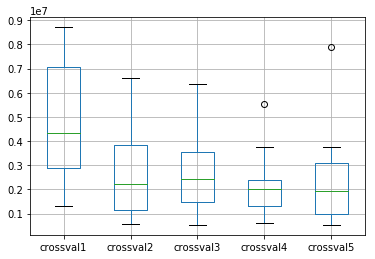

In [213]:
SSE.boxplot()

### Ordering (Best to Worse)
- 1st: Model 4
- 2nd: Model 5
- 3rd: Model 3
- 4th: Model 2
- 5th: Model 1

- Model 4 is the obvious winner because of the small length tails. We are basing my ranking off of the length of the tails and the length of the box.
- Idealy, a model with low error, small tails, and a small box would be the best model. 

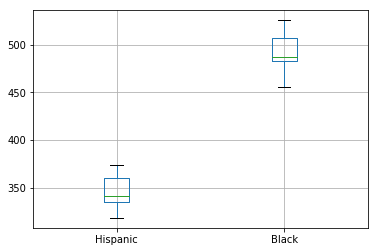

In [214]:
# Fourth model
mod4 = {}
j=0
hisp = []
black = []
for i in range(1, 75, 5):
    j += 1
    drop = list(orig[orig['precinct'].between(i, i+4)].index)
    
    test = orig[orig['precinct'].between(i, i+4)]
    
    train = orig.drop(drop)
    
    mod = smf.ols('stops~popl+past+black+hispanic', data=train)
    rslt = mod.fit()
    hisp.append(rslt.params['hispanic'])
    black.append(rslt.params['black'])
    
model4 = pd.DataFrame({'Hispanic': hisp, 'Black': black})
model4.boxplot()
    


#### Hispanic coefficiencts seem to be much less than the black coefficients for the folds.

__Conclusion__: A thorough assessment of the stop-and-frisk policy requires for sophisticated modeling (e.g. nonlinearities and interaction terms), more kinds of data (e.g. what proportion of stopped people were found to be innocent? Did the policy actually result in a reduction in crime? Is any reduction in crime worth the loss in civil liberties?). See e.g. [here](https://www.nyclu.org/en/stop-and-frisk-data). Nevertheless, it is widely agreed now that this was an unfair and harmful policy. If you are interested, [here](https://www.huffpost.com/entry/nypd-stop-and-frisks-15-shocking-facts_n_1513362) is an article from the left, and [here](https://www.nationalreview.com/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong/) is one from the right.